In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the saved solar data
file_path = 'solar_data_with_temperature_adjusted_irradiance.csv'
solar_data = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

In [4]:
solar_data

,Year,Month,Day,Hour,Minute,GHI,DNI,DHI,Temperature,Tilted Irradiance (Adjusted)
time,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,0,30,0,0,0,8.6,0.0
2019-01-01 01:00:00,2019,1,1,1,30,0,0,0,9.4,0.0
2019-01-01 02:00:00,2019,1,1,2,30,0,0,0,10.1,0.0
2019-01-01 03:00:00,2019,1,1,3,30,0,0,0,10.6,0.0
2019-01-01 04:00:00,2019,1,1,4,30,0,0,0,11.4,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019,12,31,19,30,0,0,0,6.1,0.0
2019-12-31 20:00:00,2019,12,31,20,30,0,0,0,6.6,0.0
2019-12-31 21:00:00,2019,12,31,21,30,0,0,0,6.9,0.0


In [5]:
# Print the first few rows of the data
print("First few rows of the solar data:")
print(solar_data.head())

First few rows of the solar data:
                     Year  Month  Day  Hour  Minute  GHI  DNI  DHI  \
time                                                                 
2019-01-01 00:00:00  2019      1    1     0      30    0    0    0   
2019-01-01 01:00:00  2019      1    1     1      30    0    0    0   
2019-01-01 02:00:00  2019      1    1     2      30    0    0    0   
2019-01-01 03:00:00  2019      1    1     3      30    0    0    0   
2019-01-01 04:00:00  2019      1    1     4      30    0    0    0   

                     Temperature  Tilted Irradiance (Adjusted)  
time                                                            
2019-01-01 00:00:00          8.6                           0.0  
2019-01-01 01:00:00          9.4                           0.0  
2019-01-01 02:00:00         10.1                           0.0  
2019-01-01 03:00:00         10.6                           0.0  
2019-01-01 04:00:00         11.4                           0.0  


In [6]:
# Check the data structure (columns and types)
print("\nData Structure (Columns and Data Types):")
print(solar_data.info())


Data Structure (Columns and Data Types):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          8760 non-null   int64  
 1   Month                         8760 non-null   int64  
 2   Day                           8760 non-null   int64  
 3   Hour                          8760 non-null   int64  
 4   Minute                        8760 non-null   int64  
 5   GHI                           8760 non-null   int64  
 6   DNI                           8760 non-null   int64  
 7   DHI                           8760 non-null   int64  
 8   Temperature                   8760 non-null   float64
 9   Tilted Irradiance (Adjusted)  8760 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 752.8 KB
None


In [7]:
# Check for missing values
print("\nMissing Values Summary:")
missing_values = solar_data.isnull().sum()
print(missing_values)


Missing Values Summary:
Year                            0
Month                           0
Day                             0
Hour                            0
Minute                          0
GHI                             0
DNI                             0
DHI                             0
Temperature                     0
Tilted Irradiance (Adjusted)    0
dtype: int64



Plotting Time Series for GHI:


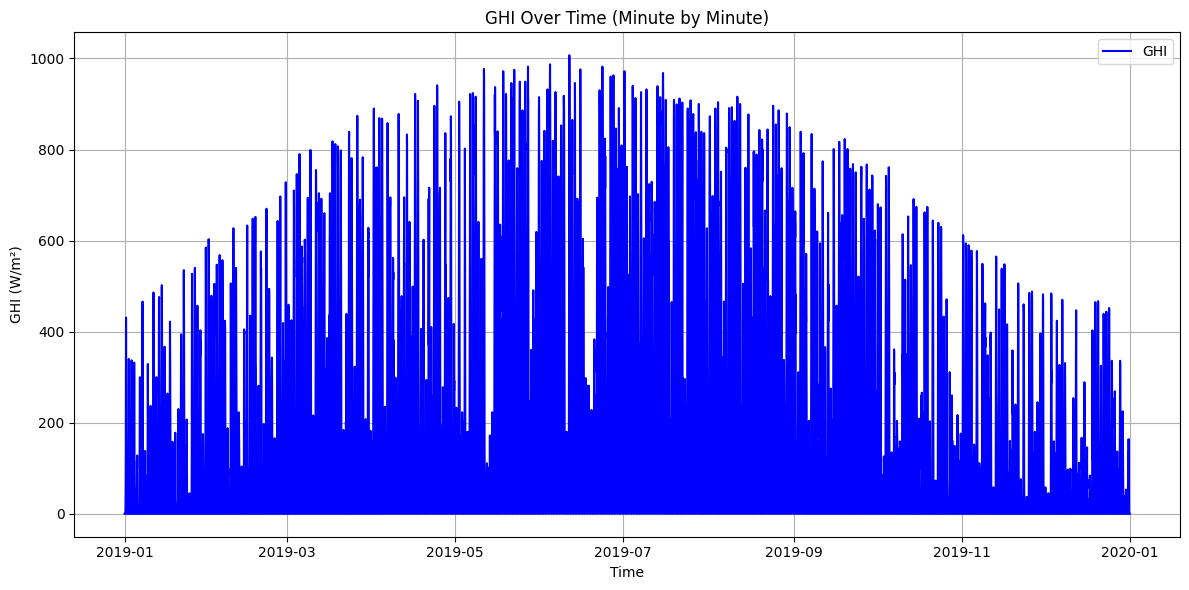


Plotting Time Series for DNI:


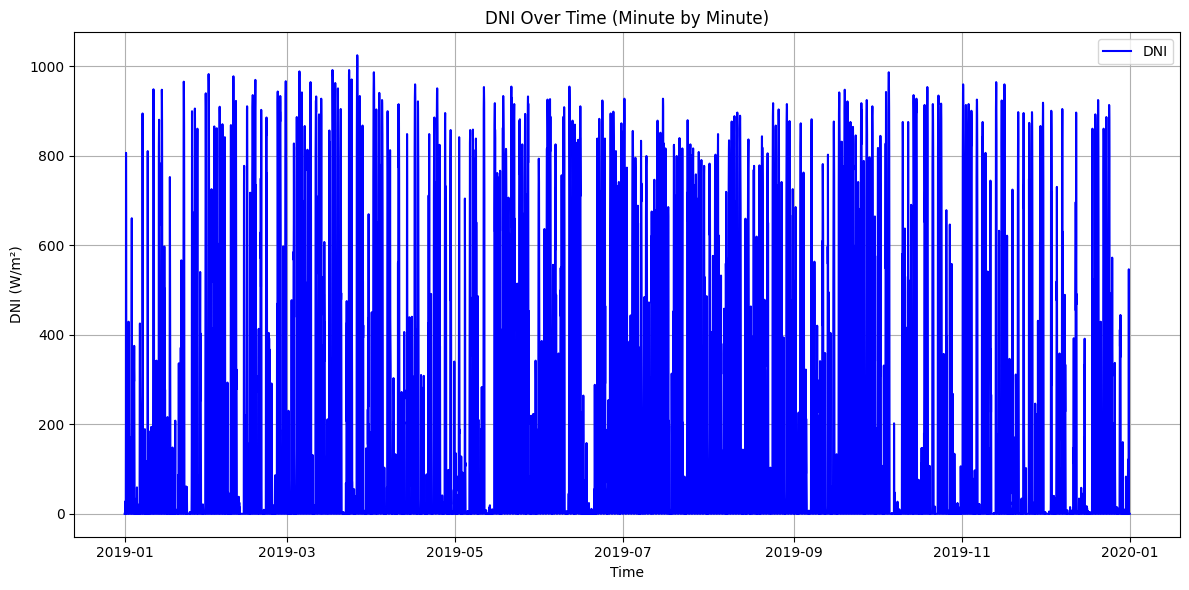


Plotting Time Series for DHI:


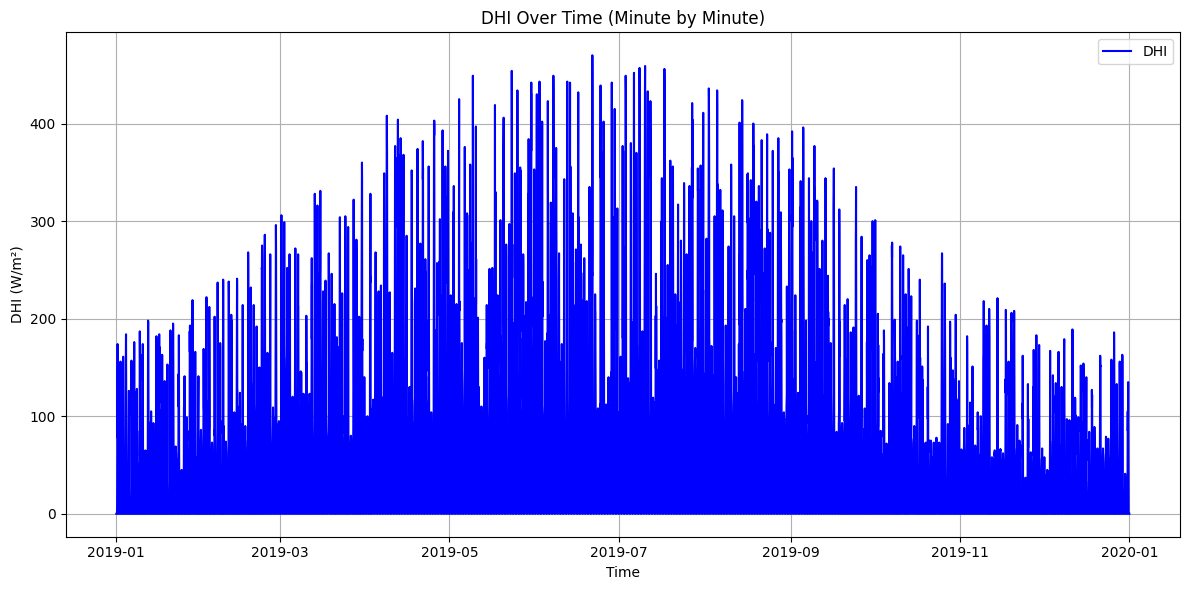


Plotting Time Series for Temperature:


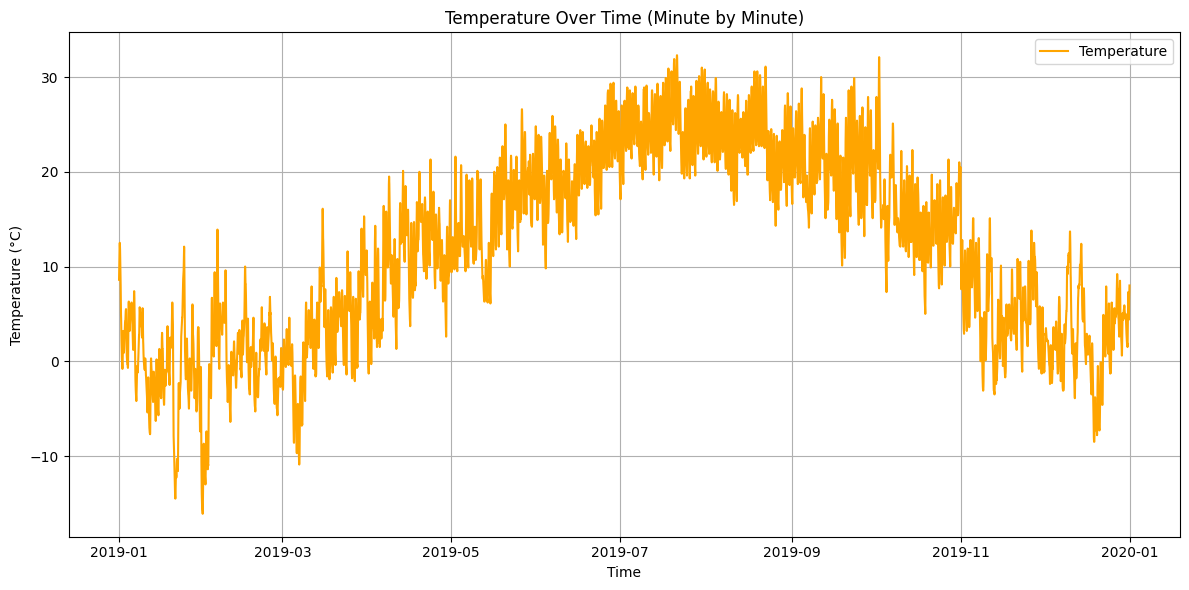


Plotting Time Series for Tilted Irradiance (Adjusted):


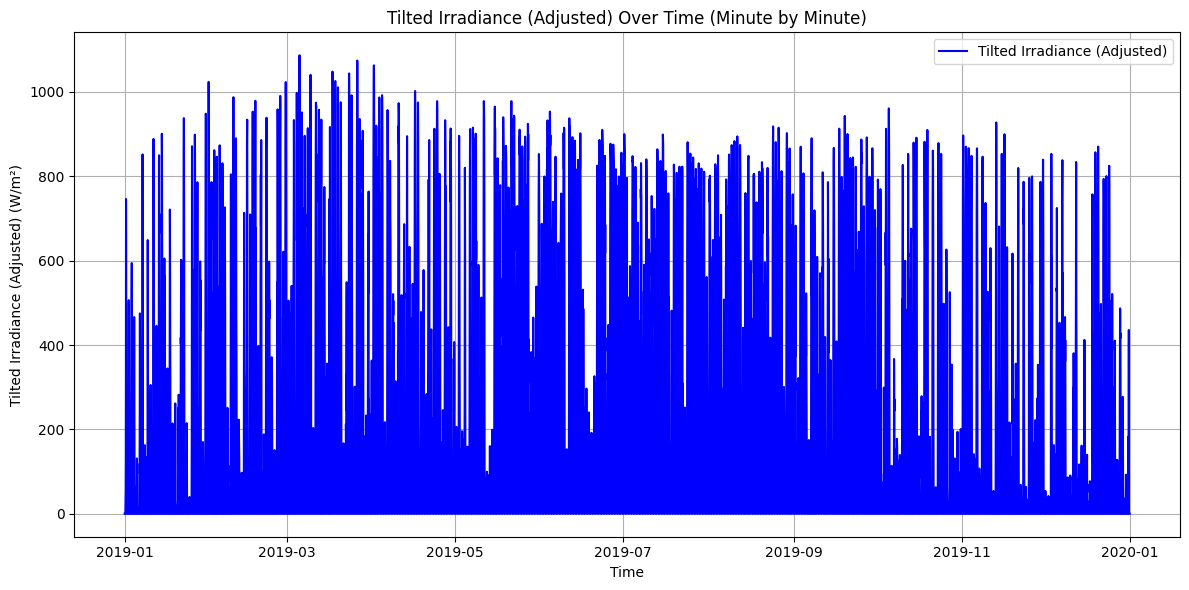


Correlation matrix (based on raw minute-by-minute data):


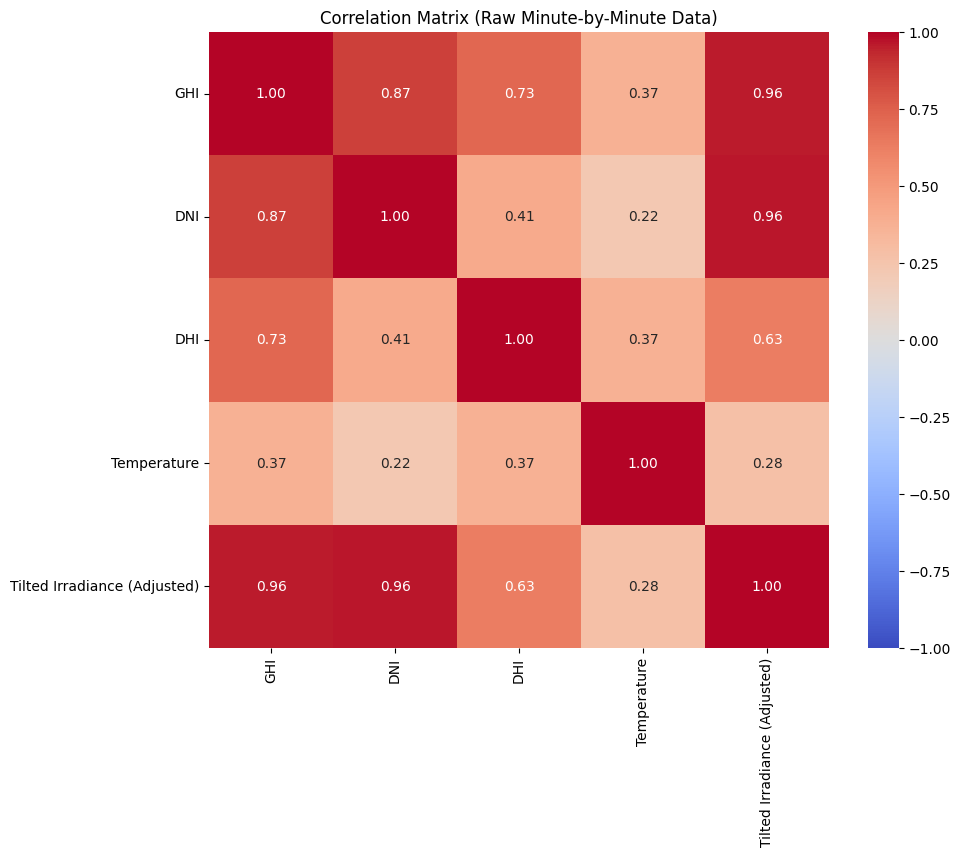

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'solar_data' contains the time series with 'time' as the index

# List of numerical columns to plot
numerical_columns = ['GHI', 'DNI', 'DHI', 'Temperature', 'Tilted Irradiance (Adjusted)']

# Create time series plots for each of the numerical columns (one value per minute)
for column in numerical_columns:
    print(f"\nPlotting Time Series for {column}:")
    
    # Create a plot for the data for each feature (minute-by-minute)
    plt.figure(figsize=(12, 6))
    plt.plot(solar_data.index, solar_data[column], color='blue' if column != 'Temperature' else 'orange', label=column)
    
    # Customize the plot
    plt.title(f'{column} Over Time (Minute by Minute)')
    plt.xlabel('Time')
    plt.ylabel(f'{column} (W/m²)' if column != 'Temperature' else f'{column} (°C)')
    plt.grid(True)
    
    # Show legend
    plt.legend()
    
    # Save the plot as a PNG image
    plt.tight_layout()
    plt.savefig(f'{column}_over_time.png')  # Save each plot as a PNG
    plt.show()

# Check for correlations between variables (based on the raw minute-by-minute data)
print("\nCorrelation matrix (based on raw minute-by-minute data):")

# Generate correlation matrix for the raw minute-by-minute data
correlation_matrix = solar_data[numerical_columns].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Raw Minute-by-Minute Data)")
plt.show()


In [9]:
# Check for basic descriptive statistics
print("\nDescriptive Statistics:")
print(solar_data.describe())


Descriptive Statistics:
         Year        Month          Day         Hour  Minute          GHI  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.0  8760.000000   
mean   2019.0     6.526027    15.720548    11.500000    30.0   160.335731   
std       0.0     3.448048     8.796749     6.922582     0.0   247.395035   
min    2019.0     1.000000     1.000000     0.000000    30.0     0.000000   
25%    2019.0     4.000000     8.000000     5.750000    30.0     0.000000   
50%    2019.0     7.000000    16.000000    11.500000    30.0     5.000000   
75%    2019.0    10.000000    23.000000    17.250000    30.0   245.000000   
max    2019.0    12.000000    31.000000    23.000000    30.0  1007.000000   

               DNI          DHI  Temperature  Tilted Irradiance (Adjusted)  
count  8760.000000  8760.000000  8760.000000                   8760.000000  
mean    178.960502    60.535616    11.786062                    200.776329  
std     294.831714    88.938913    10.038915      

In [10]:
# Identify outliers based on Z-scores (optional, if applicable)
from scipy import stats
z_scores = stats.zscore(solar_data.select_dtypes(include=['float64', 'int64']))
outliers = (z_scores > 3) | (z_scores < -3)
outliers_df = solar_data[(outliers).any(axis=1)]

print(f"\nNumber of rows with outliers: {outliers_df.shape[0]}")


Number of rows with outliers: 294
